<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%2011%20-%20Algoritmo%20de%20Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descripcion del problema

Entrada: Grafo conexo y no dirigido.

Salida: Mínimo coste de las aristas que tengan conección con todos los nodos del grafo.

Un árbol recubridor mínimo es un árbol recubridor que pesa menos o igual que todos los otros árboles recubridores, en palabras simples, se busca conseguir el conjunto de aristas más "ligeras" que recorren todos los nodos del grafo.

La búsqueda de un arbol recubridor mínimo es un problema usual para el manejo e interpretación de datos conexos en áreas tan dispares como inteligencia artificial, interpretación de datos climatológicos o teecomunicaciónes.



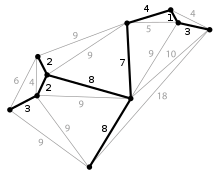

#2-Descripción del algoritmo

El algoritmo selecciona la arista con menor costo que no genere ciclos, en caso de que hayan dos aristas que cumplan la condición, se seleccionan de manera aleatoria.

Para comprobar si una arista genera un ciclo, se comprueban los padres de ambos nodos, si estos son iguales, generarían un ciclo sí que se descartan, en caso contrario, se agregan al MST.

El proceso se repite hasta haber recorrido todas las aristas, obteniendo como resultado una conexión entre los nodos del grafo que representa el mínimo peso que se puede recorrer.

Esta solución es "Greedy", ya que siempre seleccionará de manera consecutiva la opción con mayor "ganancia" de manera directa, sin  considerar otras posibles opciones.

#2.1-Codigo

In [96]:
import networkx as nx
import sys

class Graph:

    def __init__(self, vertices):
        self.V = vertices 
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    def find(self, parent, i):
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    def union(self, parent, rank, x, y):
        
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x

        else:
            parent[y] = x
            rank[x] += 1
 

    def KruskalMST(self, visualize = False, verbose = False, mostrar = True):
 
        result = []  
        i = 0
        e = 0

        if (verbose == True):
          print("Conexiones del grafo:\n")
          for u, v, w in (self.graph):
            print(f"( nodo",u,")", "--",w,"--", "( nodo", v, ")")
          print("\n")

        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        if (verbose == True):
          print("Grafo ordenado por peso de los vertices:\n")
          for u, v, w in (self.graph):
            print(f"( nodo",u,")", "--",w,"--", "( nodo", v, ")")
          print("\nComprobacion de nodos:\n")

        parent = []
        rank = []
 
        G = nx.Graph()

        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        while e < self.V - 1:
 
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            if verbose == True:
              print("Padre ( nodo", u, ") ----", "Hijo ( nodo", x, ")")
              print("Padre ( nodo", v, ") ----", "Hijo ( nodo", y, ")")
              

            if x != y:
                if (verbose == True):
                  print("Padres distintos, se agrega la arista\n")
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            else:
              if verbose == True:
                print("Padres iguales, no se agrega la arista\n")
 
        minimumCost = 0
        
        if mostrar:
          print("Aristas obtenidas\n")
        for u, v, weight in result:
            minimumCost += weight
            if mostrar:
              print(f"( nodo",u,")", "--",weight,"--", "( nodo", v, ")")

            if(visualize == True):
              G.add_node(u)
              G.add_node(v)
              G.add_edge(u, v, weight = weight)
      
        if (visualize == True):
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout (G, prog = "twopi")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

        if mostrar: 
          print("\nCoste del MST:", minimumCost)
 
 
# Driver's code
if __name__ == '__main__':

    visualize = False
    verbose = False

    g = Graph(4)
    g.addEdge(0, 1, 10)
    g.addEdge(0, 2, 6)
    g.addEdge(0, 3, 5)
    g.addEdge(1, 3, 15)
    g.addEdge(2, 3, 4)
  
    if visualize:
      G = nx.Graph()
      for u, v, weight in g.graph:
          

          G.add_node(u)
          G.add_node(v)
          G.add_edge(u, v, weight = weight)
        
      fig, ax = plt.subplots()
      ax.set_facecolor('white')
      pos = graphviz_layout(G, prog = "twopi")

      labels = nx.get_edge_attributes(G, 'weight')
      nx.draw_networkx(G, pos)
      nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

    g.KruskalMST(visualize, verbose)
 

Aristas obtenidas

( nodo 2 ) -- 4 -- ( nodo 3 )
( nodo 0 ) -- 5 -- ( nodo 3 )
( nodo 0 ) -- 10 -- ( nodo 1 )

Coste del MST: 19


#2.2 Ejemplo de ejecución

Usemos el siguiente grafo como ejemplo:



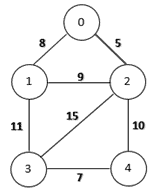

Seleccionamos la arista con menos peso, en este caso, la arista que conecta a 0 con 2.

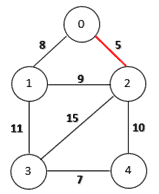

La siguiente arista de menos peso es la 3 - 4

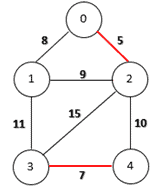

Luego la 0 - 1

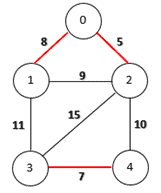

La siguiente con menos peso es la 0 - 2, pero ya que esta genra un ciclo, nos la saltamos.

Tomamos la 2 - 4 y y que todos los nodos están conectados, este es nuestro MST

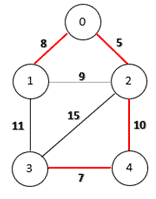

#2.3 Ejecucion paso a paso

Con la opción verbose = True podemos observar paso a paso la ejecución del algoritmo:

Conexiones del grafo:

( nodo 0 ) -- 10 -- ( nodo 1 )

( nodo 0 ) -- 6 -- ( nodo 2 )

( nodo 0 ) -- 5 -- ( nodo 3 )

( nodo 1 ) -- 15 -- ( nodo 3 )

( nodo 2 ) -- 4 -- ( nodo 3 )


Grafo ordenado por peso de los vertices:

( nodo 2 ) -- 4 -- ( nodo 3 )

( nodo 0 ) -- 5 -- ( nodo 3 )

( nodo 0 ) -- 6 -- ( nodo 2 )

( nodo 0 ) -- 10 -- ( nodo 1 )

( nodo 1 ) -- 15 -- ( nodo 3 )

Comprobacion de nodos:

Padre ( nodo 2 ) ---- Hijo ( nodo 2 )

Padre ( nodo 3 ) ---- Hijo ( nodo 3 )

Padres distintos, se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 0 )

Padre ( nodo 3 ) ---- Hijo ( nodo 2 )

Padres distintos, se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 2 )

Padre ( nodo 2 ) ---- Hijo ( nodo 2 )

Padres iguales, no se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 2 )

Padre ( nodo 1 ) ---- Hijo ( nodo 1 )

Padres distintos, se agrega la arista

Aristas obtenidas

( nodo 2 ) -- 4 -- ( nodo 3 )

( nodo 0 ) -- 5 -- ( nodo 3 )

( nodo 0 ) -- 10 -- ( nodo 1 )

Coste del MST: 19

#3-Tiempo de ejecución

El algoritmo Kruskal posee una complejidad temporal de $O(E*Log(V))$.

Lo anterior se debe al paso a paso del algoritmo, ya que en un comienzo se ordenar los arcos ($E$) según su costo, lo que toma $O(E*Log(E))$.

Luego se revisan los arcos que se puedan conectar, mientras que no se generen ciclos, ni que la cantidad de nodos conectados sea mayor a $V-1$. Para esto se utiliza Union-Find, que toma como máximo $O(log(V))$, esta operación se hace para todos los arcos del grafo. La complejidad general de esta parte sería de $O(E*(Log(V))$.

Sumando las 2 operaciones da $O(E*Log(E)) + O(E*Log(V))$. Lo que tambien se puede expresar como $O(E*(Log(E) + Log(V) ))$.

> $V$ es la cantidad de nodos del grafo recibido y $E$ es la cantidad de arcos del mismo grafo, y el estimado de estos es que se encuentran entre $V-1 \leq E \leq 2V$

En algunos casos los tiempos de ejecución suelen ser de $O(E) = O(V)$, lo que significa que $O(log(E))$ es igual a $O(Log(V))$.

Lo que significa que la suma de los tiempos de anteriores se pueden simplificar, de manera que quede como:

$O(E*(Log(E) + Log(V) ))$ $=$ $O(E*(2*Log(E)))$.

Lo anterior se puede simplificar aún más, pero para mayor precisión general, la complejidad se deja expresada como $O(E*Log(V))$, ya que aplica para más casos, ya que a veces $E$ llega a ser mucho mayor a $V$

#4-Correctitud

##Teorema

El algoritmo entrega un árbol de costo mínimo que conecta todos los nodos con arcos, de manera que no se generen ciclos.

##Prueba del teorema

Para comprobar la correctitud, utilizaremos la propiedad invariante de bucle:

> En cada iteración $i$ del bucle, se tendrá un árbol con ϵ arcos, siendo estos menores a $V-1$, ni que los mismos generen ciclos.

Lo que se quiere conseguir es que el árbol contega $V$ nodos y $V-1$ arcos, y en cada iteración $i$ es un nodo que se revisa.

Kruskal puede utilizar más de un algoritmo para verificar si se generan ciclos, pero en esta implmentación se utilizará Union-Find.
###Inicialización

En la iteración $i=1$, se tendrá un árbol vacío y se revisará el arco con menor costo ($i$). Se llama a UF (Union-Find), para verificar si hay ciclos al agregar el arco.

> Como se utiliza la primera iteración, no es posible generar ciclos con menos de 3 arcos, pero de igual manera es aplicable para un mayor número de iteración, esto asumiendo que Union-Find sea correcto.

###Mantención

Asumiendo que la inicialización es correcto, consideraremos que $i = x$ es el arco que se busca agregar

    1 < x < V

Tomando lo anterior, se revisa el arco $x$, si los nodos que se encuentran conectado al arco, son parte del mismo sub-conjunto, al agregar ese arco se creará un ciclo, por lo que este no se agregará al árbol. En caso que no se encuentren en el mismo sub-conjunto, si se agrega al árbol.

La operación se realiza con UF, especificamente con el Find.

> Find genera unos nombres para cada sub-conjunto de nodos, en base a los arcos con los que esten conectados. Los nodos estan previamente ordenados según su costo.

El árbol jamás tendrá más de $V-1$ arcos, ya que en caso contrario, significa que hay un ciclo presente.

Con lo anterior, al finalizar la iteración $i = x+1$ se seguirá cumpliendo la propiedad.

###Conclusión

Como la propiedad es correcta al inicio y final de cada iteración, al finalizar la n-ésima iteración, donde ϵ $= V-1$, se tendrá un árbol con $V$ nodos conectados si ciclos entre si.

import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]

  t = repeat(setup="from __main__ import greedy", stmt=f"greedy({W},{wt},{val},{cont}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({W},{wt},{val},{len(val)},{cont},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Solucion Greedy", "Solucion dinámica"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

#5-Experimentos

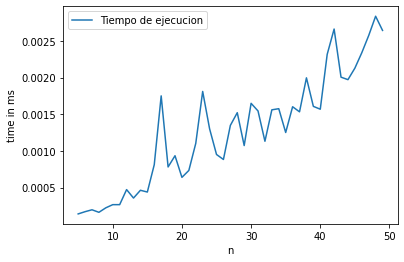

In [88]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph


x=[]; y=[]; 



for n in range(5,50):
  cont = [0]
  g = Graph(n)
  g.graph = graph_instance_creator(n)

  t = repeat(setup = "from __main__ import Graph", stmt = lambda: g.KruskalMST(False, False,False), number = 10, repeat = 1)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Tiempo de ejecucion"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Analisis de resultados:

Podemos apreciar en la gráfica que el tiempo de ejecución crece de manera lineal junto con el aumento de nodos en el grafo, lo que corrobora el tiempo de ejecución anteriormente presentado.

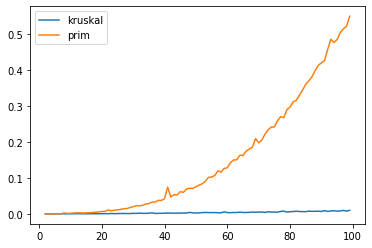

In [108]:
from timeit import repeat

class Graph2:

  def __init__(self, vertices):
          self.V = vertices
          self.graph = [[0 for column in range(vertices)]
                        for row in range(vertices)]
                        
  def minKey(self, key, mstSet):
      min_index = 0
      # Initialize min value
      min = sys.maxsize

      for v in range(self.V):
          if key[v] < min and mstSet[v] == False:
              min = key[v]
              min_index = v

      return min_index


  def primMST(self):

      key = [sys.maxsize] * self.V
      parent = [None] * self.V 
      key[0] = 0
      mstSet = [False] * self.V

      parent[0] = -1  

      for cout in range(self.V):

          u = self.minKey(key, mstSet)

          mstSet[u] = True
          for v in range(self.V):

              if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                  key[v] = self.graph[u][v]
                  parent[v] = u

x = []; y1=[]; y2= []

for n in range(2,100):
    g = Graph(n)
    g.graph = graph_instance_creator(n)

    g2 = Graph2(n)
    g2.graph = graph_instance_creator(n)

    t1 = repeat(setup = "from __main__ import Grafo", stmt = lambda: g.KruskalMST(False, False, False), number = 10, repeat = 1)
    t2 = repeat(setup = "from __main__ import Grafo", stmt = lambda: g2.primMST(), number = 10, repeat = 1)
    x.append(n)
    y1.append(t1)
    y2.append(t2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["kruskal", "prim"])

##Análisis de resultados:

Podemos observar que el algoritmo de primm tiene un tiempo de ejecución mayor al del algoritmo de kruskal.